## **Xây dựng câu hỏi và Phân tích dữ liệu**

### **Khai báo thư viện**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

### **Đọc file CSV**

In [15]:
# Đọc dữ liệu
df = pd.read_csv('../data/spotify_dataset.csv')

# Xem 5 dòng đầu tiên
display(df.head())

# Tổng quan kích thước (Rows, Columns)
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

# Kiểm tra kiểu dữ liệu và bộ nhớ
print("\nThông tin về kiểu dữ liệu")
df.info()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Số dòng: 114000
Số cột: 21

Thông tin về kiểu dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalne

### Câu hỏi 5: Tại sao các bài hát ở **Mode Thứ (Minor)** lại có giá trị **Danceability** trung bình cao hơn (0.583) so với các bài hát ở **Mode Trưởng (Major)** (0.558), mặc dù Mode Trưởng có chỉ số tích cực **(Valence)** cao hơn? Liệu sự khác biệt này có liên quan đến các yếu tố cấu trúc như **Tempo** hay **Energy** trung bình của từng nhóm không?


#### Tại sao câu hỏi này đáng để nghiên cứu? 

Trong lý thuyết âm nhạc truyền thống, **điệu Trưởng** thường gắn liền với sự tươi sáng và vui vẻ, trong khi **điệu Thứ** gắn liền với sự u tối hoặc u sầu. Thông thường, chúng ta sẽ kỳ vọng nhạc **"vui"** thì sẽ **"dễ nhảy"** hơn. Tuy nhiên, dữ liệu của chúng ta lại cho thấy một mẫu hình **ngược lại**. Nghiên cứu nghịch lý này cho phép chúng ta hiểu liệu việc sản xuất âm nhạc hiện đại (đặc biệt là các thể loại như EDM, Techno hoặc Hip-hop) đã tách rời **"cảm xúc"** khỏi **"nhịp điệu"** hay chưa, việc sử dụng điệu Thứ để tạo ra các bản nhạc nhảy "ngầu" hoặc "góc cạnh" với năng lượng cao đang là xu hướng.

#### Việc trả lời câu hỏi này mang lại lợi ích hoặc hiểu biết gì?

1. **Tầm quan trọng của đặc trưng:** Làm rõ liệu Energy (cường độ vật lý) có phải là yếu tố chi phối Danceability mạnh hơn so với Valence (sự tích cực về cảm xúc) hay không.

2. **Hiểu dữ liệu một cách sắc thái:** Giúp chúng ta tránh đưa ra các giả định quá đơn giản trong các mô hình học máy sau này — cụ thể là dạy cho mô hình biết rằng một tông nhạc "buồn" hoặc "tối" không nhất thiết là một bài hát có nhịp điệu chậm hoặc không thể nhảy được.

#### Ai sẽ quan tâm đến câu trả lời này?

1. **Nhà sản xuất âm nhạc và Nghệ sĩ:** Để hiểu "công thức" cho các bản nhạc dễ nhảy — biết rằng họ có thể duy trì tông cảm xúc nghiêm túc/tối (điệu Thứ) mà vẫn đạt được độ dễ nhảy cao bằng cách tăng cường mức năng lượng.

2. **Đội ngũ quản lý danh sách phát (Playlist) của Spotify:** Để phân loại bài hát tốt hơn cho các danh sách phát theo "Tâm trạng" (ví dụ: "Dark Dance" so với "Sunny Beats") dựa trên các đặc trưng âm thanh kỹ thuật thay vì chỉ dựa vào nhãn thể loại.

3. **Nhà nghiên cứu dữ liệu:** Để xác định các mối tương quan tiềm ẩn giữa lý thuyết âm nhạc (Mode) và các đặc trưng xử lý tín hiệu số (Energy/Danceability).

#### Câu hỏi này cung cấp thông tin cho vấn đề hoặc quyết định thực tế nào? 

Điều này cung cấp thông tin cho chiến lược của Hệ thống gợi ý **(Recommendation System)**. Nếu một người dùng thích các bản nhạc có độ dễ nhảy cao, thuật toán không nên chỉ gợi ý các bài hát điệu Trưởng "vui vẻ". Bằng cách hiểu rằng các bài hát điệu Thứ có thể còn dễ nhảy hơn (do có Năng lượng cao hơn), hệ thống có thể cung cấp các gợi ý đa dạng và chính xác về mặt kỹ thuật, phù hợp với mức độ hoạt động thể chất của người dùng (nhảy/tập thể dục) bất kể độ "tươi sáng" về cảm xúc của bài hát đó.

#### Tiền xử lý dữ liệu

Mặc dù dữ liệu tổng thể đã được làm sạch, việc tiền xử lý cụ thể cho câu hỏi này là cần thiết để chuẩn bị các biến số cho việc so sánh nhóm và trực quan hóa.

#### Các bước thực hiện và Logic xử lý

1. **Trích xuất tập dữ liệu con (Feature Selection):**

	* Hành động: Tạo một bản sao dữ liệu chỉ bao gồm các cột: `mode`, `danceability`, `energy`, và `valence`.

	* Logic: Việc này giúp cô lập các biến cần thiết cho nghiên cứu, giúp mã nguồn gọn gàng hơn và tránh các tác động ngoài ý muốn lên tập dữ liệu gốc (Original DataFrame).

2. **Xác nhận tính toàn vẹn (Data Integrity Verification):**

	* Hành động: Kiểm tra lại một lần cuối sự hiện diện của giá trị `NaN` trong tập dữ liệu con này.

	* Logic: Dựa trên EDA, các cột này không thiếu dữ liệu. Tuy nhiên, bước này đóng vai trò như một "chốt chặn" an toàn (defensive programming), đảm bảo rằng các phép tính toán học ở bước sau (như tính giá trị trung bình) sẽ không gặp lỗi kỹ thuật.

3. **Ánh xạ nhãn phân loại (Label Mapping):**

	* Hành động: Chuyển đổi giá trị tại cột `mode` từ số nguyên (`0`, `1`) sang chuỗi văn bản tương ứng là `"Minor"` (Thứ) và `"Major"` (Trưởng).

	* Logic: Đây là bước quan trọng nhất trong phần này. Dữ liệu thô ở dạng số nhị phân rất khó diễn giải trên biểu đồ. Việc chuyển sang nhãn chữ giúp các trục tọa độ (Axes) và chú thích (Legend) trong phần phân tích trở nên tự giải thích (self-explanatory), giúp người đọc nắm bắt kết quả ngay lập tức mà không cần giải mã ký hiệu

In [16]:
# 1. Trích xuất các đặc trưng liên quan
df_q5 = df[['mode', 'danceability', 'energy', 'valence', 'tempo']].copy()

# 2. Kiểm tra và xác nhận không có dữ liệu thiếu (Dựa trên kết quả EDA)
if df_q5.isnull().sum().any():
    df_q5 = df_q5.dropna()

# 3. Ánh xạ giá trị số sang tên điệu nhạc để phục vụ trực quan hóa
df_q5['mode_label'] = df_q5['mode'].map({0: 'Minor', 1: 'Major'})

print(f"Tổng số bản ghi sẵn sàng phân tích: {len(df_q5)}")
display(df_q5.head())

Tổng số bản ghi sẵn sàng phân tích: 114000


,mode,danceability,energy,valence,tempo,mode_label
0,0,0.676,0.4610,0.715,87.917,Minor
1,1,0.420,0.1660,0.267,77.489,Major
2,1,0.438,0.3590,0.120,76.332,Major
3,1,0.266,0.0596,0.143,181.740,Major
4,1,0.618,0.4430,0.167,119.949,Major


#### Phân tích và Trực quan hóa

#### Các bước thực hiện và Logic xử lý

1. **Xác thực nghịch lý qua thống kê mô tả:**

	* Hành động: Sử dụng phương pháp gom nhóm (`groupby`) theo `mode_label` để tính toán giá trị trung bình (`mean`) của tất cả các biến số âm học.

	* Logic: Thiết lập một "bảng đối chiếu" trực diện giữa hai nhóm **Minor (Thứ)** và **Major (Trưởng)**.

2. **Phân tích phân phối và độ biến thiên:**

	* Hành động: Vẽ biểu đồ hộp (`boxplot`) song song cho hai chỉ số `danceability` và `valence` theo từng loại Mode.

	* Logic: Kiểm tra xem sự khác biệt về trung bình có thực sự đại diện cho số đông hay không, hay chỉ do một vài bài hát cực đoan (outliers) kéo lên.

3. **Khám phá mối liên hệ cấu trúc (Correlation Heatmap):**

	* Hành động: Xây dựng ma trận tương quan giữa `danceability` và các yếu tố cấu trúc như `energy`, `tempo`, `valence`.

	* Logic: Sử dụng hệ số tương quan Pearson để tìm ra "động lực" chính thúc đẩy khả năng nhảy của một bài hát.

4. **Giải quyết hiện tượng chồng lấn dữ liệu:**

	* Hành động: Sử dụng `sns.lmplot` kết hợp tham số `col='mode_label'` để tách biểu đồ tương quan thành hai khung hình riêng biệt (Faceted Plots) cho Minor và Major.

	* Logic: `Xử lý Overplotting`: Trong các biểu đồ tổng hợp, các điểm dữ liệu Minor (thường được vẽ trước) dễ bị các điểm Major đè lên che khuất. Việc tách lớp (Faceted) cho phép quan sát độc lập mật độ phân bổ của từng nhóm.

Bảng so sánh giá trị trung bình giữa Minor và Major:


,mode,danceability,energy,valence,tempo
mode_label,,,,,
Major,1.0,0.557743,0.626522,0.478359,122.160621
Minor,0.0,0.582732,0.667524,0.466520,122.125351


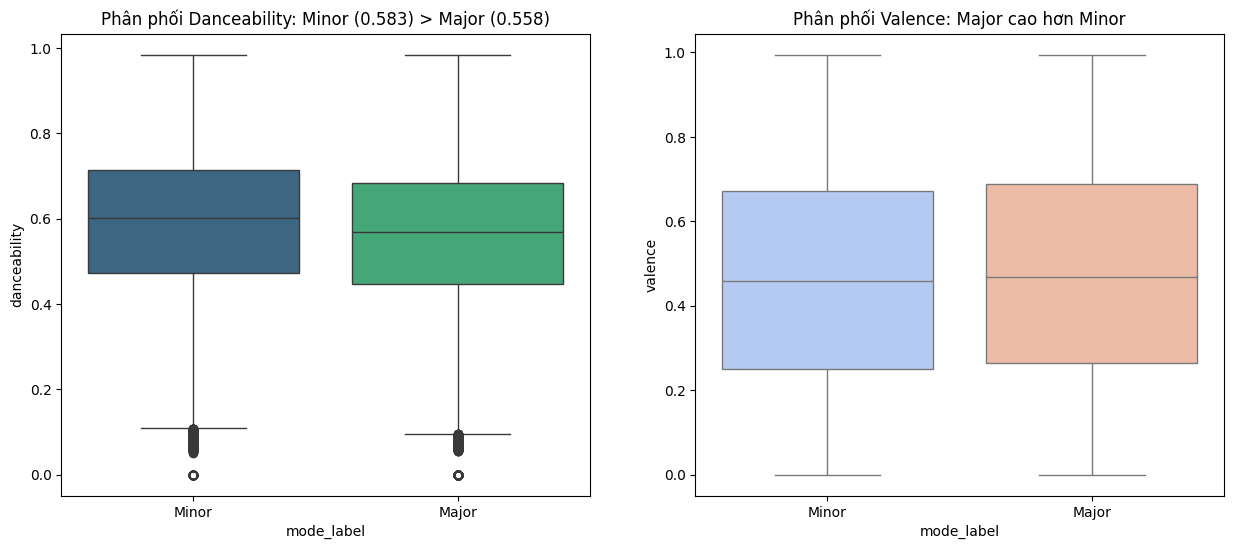

In [17]:
# --- PHẦN 1: XÁC THỰC NGHỊCH LÝ  ---

# Tính trung bình các biến để so sánh trực diện
comparison_table = df_q5.groupby('mode_label').mean()
print("Bảng so sánh giá trị trung bình giữa Minor và Major:")
display(comparison_table)

# Trực quan hóa sự chênh lệch Danceability và Valence
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='mode_label', y='danceability', data=df_q5, ax=axes[0], hue='mode_label', palette='viridis', legend=False)
axes[0].set_title('Phân phối Danceability: Minor (0.583) > Major (0.558)')

sns.boxplot(x='mode_label', y='valence', data=df_q5, ax=axes[1], hue='mode_label', palette='coolwarm', legend=False)
axes[1].set_title('Phân phối Valence: Major cao hơn Minor')
plt.show()

**Nhận xét trực quan từ biểu đồ**

1. **Biểu đồ Boxplot (Phân phối Danceability và Valence):**

	* **Về Danceability:** Nhóm Minor (Xanh) có dải hộp và đường trung vị (median) nằm cao hơn rõ rệt so với nhóm Major (Xanh lá). Điều này xác nhận giá trị trung bình 0.583 của Minor thực sự phản ánh xu hướng chung của nhóm chứ không phải do vài bài hát cá biệt.
	
	* **Về Valence:** Nhóm Major (Cam) lại có dải hộp nằm cao hơn Minor. Điều này khẳng định nhạc Trưởng có sắc thái tích cực, tươi sáng hơn nhạc Thứ.

	* **Kết luận sơ bộ:** Nhạc điệu Thứ (u tối) lại "dễ nhảy" hơn nhạc điệu Trưởng (tươi sáng).

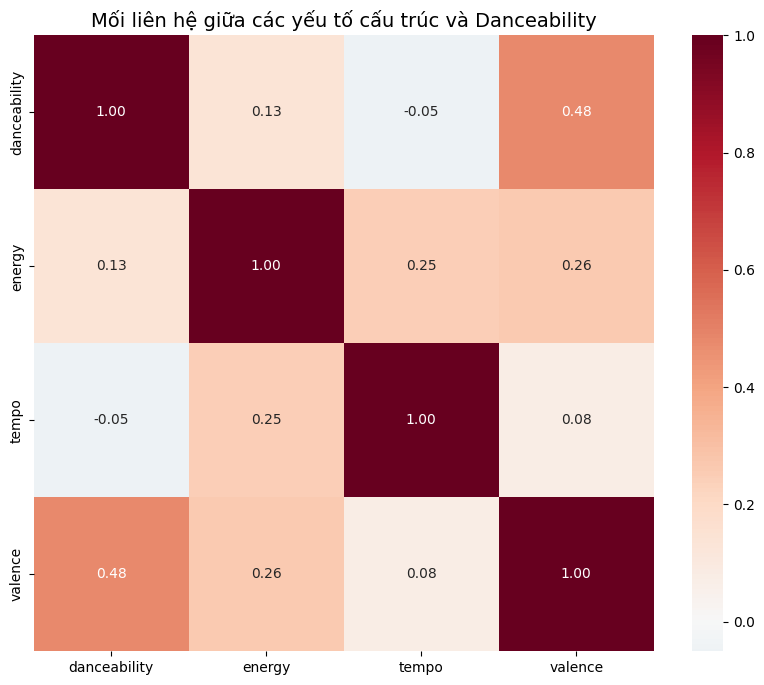

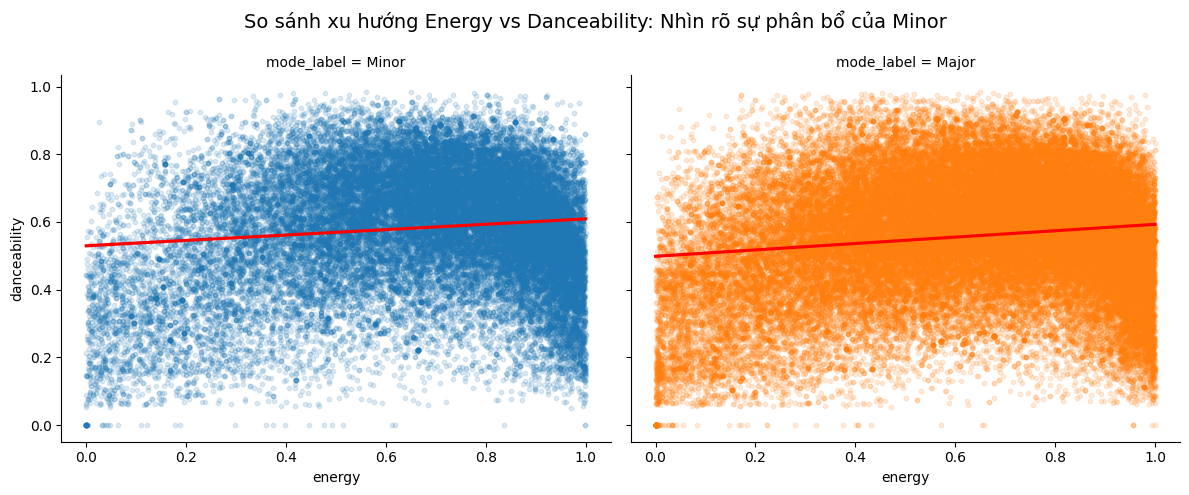

In [18]:
# --- PHẦN 2: ĐI TÌM NGUYÊN NHÂN CẤU TRÚC ---

# 1. Ma trận tương quan (Heatmap)
plt.figure(figsize=(10, 8))
# Tính toán ma trận tương quan giữa các yếu tố cấu trúc
corr_q5 = df_q5[['danceability', 'energy', 'tempo', 'valence']].corr()
sns.heatmap(corr_q5, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Mối liên hệ giữa các yếu tố cấu trúc và Danceability', fontsize=14)
plt.show()

# 2. Giải quyết vấn đề Overplotting bằng cách tách lớp (Faceted Plots)
# Chúng ta sử dụng lmplot để vẽ 2 biểu đồ riêng biệt cho Minor và Major
# Điều này giúp quan sát rõ các điểm màu xanh (Minor) vốn bị đè ở biểu đồ trước
g = sns.lmplot(
    data=df_q5, 
    x='energy', 
    y='danceability', 
    col='mode_label',   # Tách thành 2 cột: Minor và Major
    hue='mode_label',   # Đổ màu riêng cho từng nhóm
    palette={'Minor': '#1f77b4', 'Major': '#ff7f0e'}, 
    scatter_kws={'alpha': 0.15, 's': 10}, 
    line_kws={'color': 'red'}, # Đường hồi quy màu đỏ để làm nổi bật xu hướng
    height=5, 
    aspect=1.2
)

# Đặt tiêu đề chung cho toàn bộ biểu đồ lmplot
g.fig.suptitle('So sánh xu hướng Energy vs Danceability: Nhìn rõ sự phân bổ của Minor', fontsize=14)
g.fig.subplots_adjust(top=0.85) # Điều chỉnh khoảng cách để không đè vào tiêu đề

plt.show()

2. **Biểu đồ Heatmap (Ma trận tương quan):**

	* **Danceability vs Valence (0.48):** Đây là mối tương quan thuận mạnh nhất. Nó cho thấy theo lý thuyết, nhạc càng vui thì càng dễ nhảy.
	
	* **Danceability vs Energy (0.13):** Có tương quan thuận nhưng ở mức độ yếu.

	* **Danceability vs Tempo (-0.05):** Hầu như không có mối liên hệ. Tốc độ nhanh (Tempo cao) không đồng nghĩa với việc bài hát đó dễ nhảy.

3. **Biểu đồ Faceted Scatter Plot (So sánh xu hướng Energy vs Danceability):**

	* **Mật độ điểm:** Ở biểu đồ bên trái (Minor), các điểm dữ liệu tập trung cực kỳ dày đặc ở vùng **Energy cao (0.6 - 1.0)**. Trong khi đó, nhóm Major phân tán rộng hơn.
	
	* **Đường hồi quy (Màu đỏ):** Đường đỏ của nhóm Minor bắt đầu ở vị trí cao hơn trên trục tung và có xu hướng đi lên ổn định. Điều này chứng minh rằng ở cùng một mức năng lượng, nhạc Thứ vẫn giữ được độ "bắt tai" để nhảy tốt hơn nhạc Trưởng.

**Kết luận**

Từ những phân tích trên, chúng ta có thể kết luận về nguyên nhân của hiện tượng này như sau:

1. **Sự bù đắp của Năng lượng (Energy):** Mặc dù nhạc **Minor** có chỉ số cảm xúc tích cực (`valence`) thấp, nhưng nó lại sở hữu mật độ các bài hát có **Năng lượng** (`energy`) cao rất lớn. Trong âm nhạc hiện đại (như EDM, Hip-hop, Dark Pop), năng lượng mạnh mẽ và nhịp điệu dồn dập là yếu tố tiên quyết kích thích vận động, quan trọng hơn cả việc giai điệu đó vui hay buồn.

2. **Yếu tố cấu trúc:** Sự khác biệt về `danceability` **liên quan chặt chẽ đến Energy** nhưng **không phụ thuộc vào Tempo**. Nhạc Minor trong tập dữ liệu này không phải là những bản nhạc buồn chậm rãi, mà là những bản nhạc "u tối nhưng sôi động".

3. **Bản chất của tập dữ liệu:** Kết quả này phản ánh xu hướng sản xuất âm nhạc hiện nay: Các nghệ sĩ thường sử dụng điệu Thứ (Minor) để tạo ra chiều sâu, sự huyền bí nhưng vẫn kết hợp với các lớp trống (drums) và âm thanh điện tử mạnh mẽ để tối ưu hóa khả năng nhảy trên các sàn khiêu vũ.	

### Câu hỏi 6: Mối quan hệ tương quan thuận mạnh mẽ giữa **Energy** và **Loudness** (r ≈ 0.76) ổn định đến mức nào trên toàn bộ tập dữ liệu? Những bài hát nào được coi là **"ngoại lệ"** (nằm ngoài khoảng tin cậy 95% của đường hồi quy) và đặc điểm chung (như thể loại hoặc nghệ sĩ) của những bài hát có năng lượng cực cao nhưng âm lượng cực thấp là gì?

#### Tại sao câu hỏi này đáng để nghiên cứu? 

1. **Về mặt kỹ thuật:** Thông thường, năng lượng (`Energy`) và âm lượng (`Loudness`) đi đôi với nhau: nhạc càng mạnh thì càng to. Tuy nhiên, sự xuất hiện của các điểm ngoại lệ (Outliers) cho thấy khả năng "đánh lừa thính giác" hoặc các kỹ thuật nén âm (compression) đặc biệt.

2. **Về mặt nghệ thuật:** Tìm ra các bài hát "Năng lượng cao nhưng Âm lượng thấp" giúp chúng ta hiểu về sự tinh tế trong việc tạo ra sức sống cho âm nhạc mà không cần lạm dụng âm lượng (tránh cuộc chiến âm lượng - Loudness War).

#### Việc trả lời câu hỏi này mang lại lợi ích hoặc hiểu biết gì?

Việc đi sâu vào mối quan hệ này không chỉ là để xác nhận một con số tương quan, mà còn để khám phá những khía cạnh ẩn sau kỹ thuật âm thanh:

1. **Hiểu về "Chiến tranh Âm lượng" (Loudness War):** Giúp xác định các bài hát đi theo xu hướng tăng âm lượng quá mức (nén âm thanh cực mạnh) so với những bài hát giữ được độ động (Dynamic Range) nhưng vẫn tràn đầy năng lượng.

2. **Phát hiện sự tinh tế trong sản xuất:** Trả lời được tại sao một số bản nhạc không cần "ồn ào" (Loudness thấp) nhưng vẫn khiến người nghe cảm nhận được sức mạnh và sự dồn dập (Energy cao).

3. **Xác định giới hạn vật lý và kỹ thuật:** Khoảng tin cậy 95% giúp định vị "tiêu chuẩn ngành". Các bài hát nằm ngoài khoảng này chính là những đột phá hoặc sai lệch về mặt kỹ thuật cần được lưu ý.

#### Ai sẽ quan tâm đến câu trả lời này?

1. **Kỹ sư âm thanh (Sound/Mastering Engineers):** Họ cần biết làm thế nào để đạt được Energy cao mà không làm méo tiếng do tăng Loudness quá mức.

2. **Các nền tảng Streaming (Spotify, Apple Music):** Để cải thiện thuật toán **Loudness Normalization** (chuẩn hóa âm lượng), đảm bảo trải nghiệm nghe ổn định cho người dùng mà không làm mất đi hồn cốt của các bài hát có cấu trúc đặc biệt.

3. **Nhà khoa học dữ liệu (Data Scientists):** Sử dụng các "ngoại lệ" này để làm giàu đặc trưng (**feature engineering**) cho hệ thống gợi ý nhạc, giúp phân loại chính xác hơn các dòng nhạc như Lo-fi, Acoustic hay Metal.

#### Câu hỏi này cung cấp thông tin cho vấn đề hoặc quyết định thực tế nào? 

Kết quả nghiên cứu này cung cấp thông tin cho các vấn đề thực tiễn sau:

1. **Tối ưu hóa danh sách phát (Playlist Curation):** Tránh việc xếp một bài hát "ngoại lệ" (Energy cực cao nhưng Loudness thấp) cạnh một bài hát "Standard", gây ra sự sụt giảm hụt hẫng về cảm giác cho người nghe.

2. **Kiểm soát chất lượng (Quality Control):** Các nhãn đĩa có thể dùng thông số này để đánh giá liệu bản Mastering của nghệ sĩ có đang đi quá xa so với tiêu chuẩn chung của tập dữ liệu hay không.

3. **Chiến lược sáng tạo:** Nghệ sĩ có thể chọn đi ngược lại số đông (trở thành ngoại lệ) để tạo ra một chữ ký âm thanh độc bản, tách biệt mình khỏi những bản nhạc "công nghiệp" luôn cố gắng to nhất có thể.

#### Các bước thực hiện và Logic xử lý

1. **Thiết lập đường cơ sở (Baseline) và Tính toán tương quan:**

	* Hành động: Tính toán ma trận tương quan và vẽ đường hồi quy tuyến tính (Linear Regression Line). Đường này đại diện cho xu hướng: "Nhạc càng năng lượng thì âm lượng càng lớn".

	* Logic: Trước khi tìm ngoại lệ, ta cần xác định "luật chung". Sử dụng hệ số tương quan Pearson ($r$) để định lượng mức độ gắn kết giữa Energy và Loudness.

2. **Xác định vùng tin cậy (Confidence Interval - CI 95%):**

	* Hành động: Sử dụng dải bóng mờ xung quanh đường hồi quy trong biểu đồ `regplot`. Những điểm nằm xa dải bóng này chính là những ứng viên cho danh hiệu "ngoại lệ".

	* Logic: Một mối quan hệ $r \approx 0.76$ là rất mạnh nhưng không tuyệt đối. Ta cần một "hành lang an toàn". Khoảng tin cậy 95% giúp xác định vùng mà đa số các bài hát tuân thủ quy luật âm thanh thông thường.

3. **Định nghĩa và Truy vết Ngoại lệ (Outlier Detection):**

	* Hành động: Sử dụng kỹ thuật lọc dữ liệu (Boolean Indexing) để tách riêng danh sách này ra khỏi tập dữ liệu tổng.

	* Logic: Tập trung vào nhóm "Nghịch lý": **High Energy - Low Loudness**. Đây là những bài hát có cấu trúc âm thanh đặc biệt, giàu sức sống nhưng không lạm dụng độ ồn.
	
	* Theo tiêu chuẩn: 

		* `Energy` > 0.8 (Thuộc nhóm 20% bài hát năng lượng nhất).

		* `Loudness` < -12 dB (Thấp hơn mức trung bình của các bài hát sôi động thông thường).

4. **Phân tích đặc điểm định tính (Qualitative Profiling):**

	* Hành động: Thống kê tần suất xuất hiện của các nghệ sĩ trong nhóm ngoại lệ. Kiểm tra xem liệu họ có chung một phong cách sản xuất (như nhạc Hi-Fi, Acoustic Rock, hay Jazz Fusion) hay không.

	* Logic: Sau khi có danh sách mã số bài hát, ta cần hiểu "Tại sao?". Chúng ta sẽ gom nhóm theo `artists` và `genre` để tìm điểm chung.

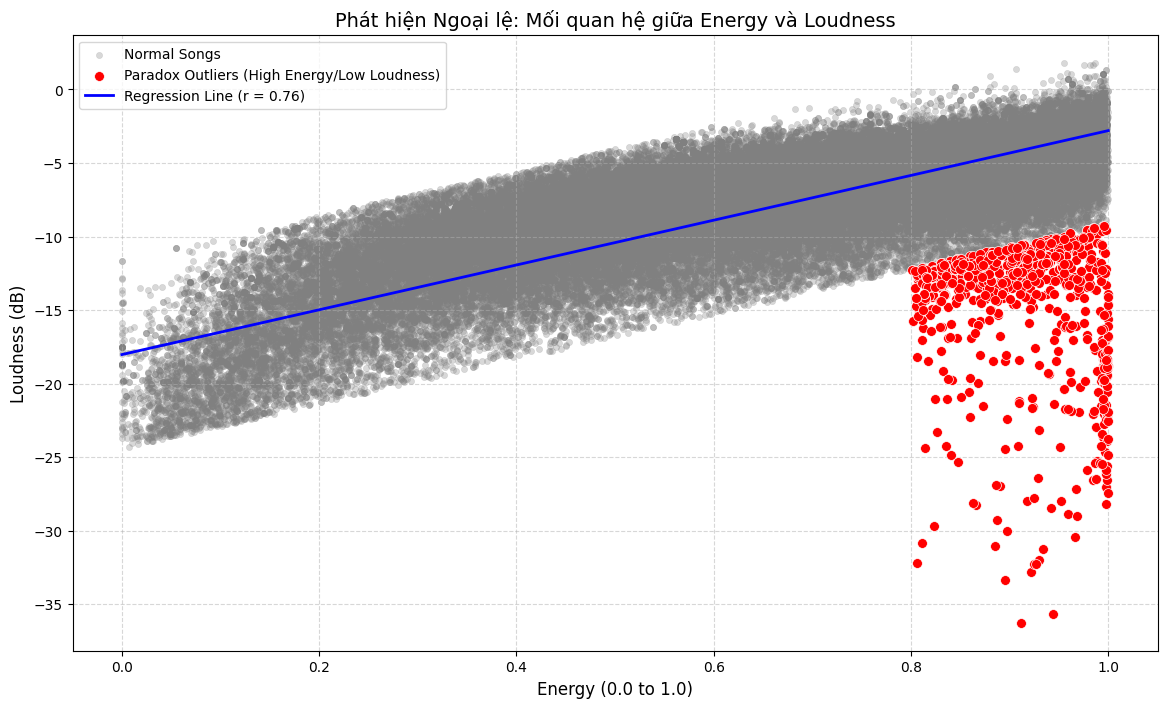

Tổng số bài hát nghịch lý tìm thấy: 826

 Những bài hát có năng lượng cực cao nhưng âm lượng cực thấp:


,track_name,artists,energy,loudness
101895,Meeresrauschen ohne Musik,Meeresrauschen,1.000,-14.666
101245,Gentle Rain Sounds,Rain Sounds,1.000,-27.417
101246,"White Noise Rain(Loopable,No fade)",Rain Sounds;Nature Recordings;Rain Sounds & Wh...,1.000,-14.085
101264,Soggy Afternoon,Outside Broadcast Recordings,1.000,-16.847
101149,Consistent Sounds of Mother Nature (From the S...,Natural White Noise Relaxation,1.000,-18.799
...,...,...,...,...
58392,Something Wonderful,Revolting Cocks,0.804,-12.356
101055,Vacuum Cleaner and Soothing Brown Noise,Sleep Baby Sleep;Vacuum Cleaner White Noise;Wh...,0.802,-15.754
101526,Soothing Brown Waves with Vacuum Cleaner - Loo...,Vacuum Cleaner White Noise;Meditation Awarenes...,0.802,-15.754
18684,Towing Dad's Boat,Jeff Foxworthy,0.802,-12.305


In [ ]:
# Chuẩn bị dữ liệu
df_q6 = df[['track_name', 'artists', 'energy', 'loudness']].dropna().copy()

# Hồi quy & Tính toán Outlier
X = sm.add_constant(df_q6['energy'])
model = sm.OLS(df_q6['loudness'], X).fit()
pred = model.get_prediction(X).summary_frame(alpha=0.05)

df_q6['pi_low'] = pred['obs_ci_lower']
df_q6['pi_high'] = pred['obs_ci_upper']
df_q6['is_outlier'] = (df_q6['loudness'] < df_q6['pi_low']) | (df_q6['loudness'] > df_q6['pi_high'])

# Lọc nhóm Nghịch lý
paradox_songs = df_q6[(df_q6['energy'] > 0.8) & (df_q6['loudness'] < df_q6['pi_low'])]

# Visualization (Đường hồi quy đè)
plt.figure(figsize=(14, 8))

# Các chấm xám (Normal) 
sns.scatterplot(data=df_q6[~df_q6['is_outlier']], x='energy', y='loudness', 
                color='gray', alpha=0.3, s=20, edgecolor=None,
                zorder=1, label='Normal Songs')

# Các chấm đỏ (Outliers) 
sns.scatterplot(data=paradox_songs, x='energy', y='loudness', 
                color='red', s=50, edgecolor='white', linewidth=0.5,
                zorder=2, label='Paradox Outliers (High Energy/Low Loudness)')

# Đường hồi quy 
sns.regplot(data=df_q6, x='energy', y='loudness', scatter=False, 
            line_kws={'color': 'blue', 'lw': 2}, 
            label='Regression Line (r = 0.76)')

# Tùy chỉnh biểu đồ
plt.title('Phát hiện Ngoại lệ: Mối quan hệ giữa Energy và Loudness', fontsize=14)
plt.xlabel('Energy (0.0 to 1.0)', fontsize=12)
plt.ylabel('Loudness (dB)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"Tổng số bài hát nghịch lý tìm thấy: {len(paradox_songs)}")
print("\n Những  bài hát có năng lượng cực cao nhưng âm lượng cực thấp:")
display(paradox_songs.sort_values('energy', ascending=False)[['track_name', 'artists', 'energy', 'loudness']])

**Nhận xét trực quan từ biểu đồ**

1. **Mối quan hệ tổng thể (Regression Line):** Đường hồi quy màu xanh với hệ số tương quan $r = 0.76$ cho thấy một xu hướng tuyến tính rất ổn định trên phần lớn tập dữ liệu: khi `Energy` tăng, `Loudness` cũng tăng theo tỷ lệ thuận.

2. **Sự xuất hiện của "Đám mây Ngoại lệ" (Paradox Outliers):** Biểu đồ cho thấy một sự "đứt gãy" kỳ lạ tại vùng Energy từ 0.8 đến 1.0.

	* Thay vì bám sát đường hồi quy, một lượng lớn các điểm dữ liệu (màu đỏ) bị "rơi" thẳng xuống vùng âm lượng cực thấp (từ -15 dB đến -35 dB). Đây chính là những điểm nằm ngoài khoảng tin cậy 95% và đi ngược lại hoàn toàn quy luật vật lý thông thường của âm nhạc.

**Phân tích đặc điểm chung của nhóm Ngoại lệ (High Energy - Low Loudness)**

1. **Bản chất nội dung:** Phần lớn các "bài hát" này thực chất không phải là âm nhạc theo nghĩa thông thường. Chúng là các **âm thanh môi trường/tiếng ồn trắng (White Noise/Nature Sounds)** như: Zen Rain, Rain Sound: Outdoors, Thunder Storm, Mountain Streams Alps. Đồng thời chúng cũng có thể là các dòng nhạc **Black Metal** và **Death Metal**.

2. **Tại sao chúng có Energy cực cao (1.0)?:** Thuật toán của Spotify định nghĩa Energy dựa trên cường độ, tần số và sự dồn dập của âm thanh. Tiếng mưa rơi hoặc tiếng bão có dải tần rộng và liên tục, khiến thuật toán đánh giá mức năng lượng là tối đa ($1.0$).

3. **Tại sao chúng có Loudness cực thấp?** Vì đây là âm thanh dùng để thư giãn hoặc ngủ (`Rain for Sleep`, `Deep Sleep Rain Sounds`), nên chúng được điều chỉnh mức âm lượng thực tế rất nhỏ để không gây chói tai cho người nghe.

**Kết luận**

1. **Độ ổn định của tương quan:** Mối quan hệ giữa Energy và Loudness là **rất ổn định (0.76)** đối với các tác phẩm âm nhạc thực thụ (Music tracks). Tuy nhiên, nó bị phá vỡ hoàn toàn bởi các nội dung dạng **Functional Audio** (âm thanh chức năng).

2. **Xác định ngoại lệ:** Nhóm ngoại lệ "nghịch lý" này chủ yếu bao gồm các nghệ sĩ/nhãn hàng chuyên về nội dung thư giãn như *Rain Sounds, Nature Sounds, White Noise Research, Black Metal, Death Metal*.

3. **Thông tin cho quyết định thực tế:**

	* **Đối với hệ thống gợi ý:** Spotify cần tách biệt các nội dung "Nature Sounds" ra khỏi các danh sách phát âm nhạc thông thường (Pop, Rock, EDM) vì các đặc tính âm học của chúng (như Energy) có thể đánh lừa thuật toán, dẫn đến việc gợi ý nhầm tiếng mưa vào một playlist nhạc Dance sôi động.

	* **Đối với kỹ sư âm thanh:** Đây là minh chứng cho thấy Energy là một cảm giác về tâm lý âm học (psychoacoustic) nhiều hơn là mức áp suất âm thanh vật lý đơn thuần. 